In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,log_loss,classification_report, accuracy_score, roc_auc_score, roc_curve,  auc 

In [4]:
# Loading the data in from my External Harddrive 
train = pd.read_csv('train.csv')

# Making Sure the Data Shows up in the notebok 
train.head()

# What are we wokring with? 

train.nunique()

ID                              67463
Loan Amount                     27525
Funded Amount                   24548
Funded Amount Investor          67441
Term                                3
Batch Enrolled                     41
Interest Rate                   67448
Grade                               7
Sub Grade                          35
Employment Duration                 3
Home Ownership                  67454
Verification Status                 3
Payment Plan                        1
Loan Title                        109
Debit to Income                 67454
Delinquency - two years             9
Inquires - six months               6
Open Account                       36
Public Record                       5
Revolving Balance               20582
Revolving Utilities             67458
Total Accounts                     69
Initial List Status                 2
Total Received Interest         67451
Total Received Late Fee         67380
Recoveries                      67387
Collection R

### So what Columns do we have here? 

ID - unique identifier for each loan application

Loan Amount - the amount requested by the borrower

Funded Amount - the amount funded by investors for the loan

Funded Amount Investor - the amount funded by investors for the loan

Term - the length of the loan term in months

Batch Enrolled - the batch enrollment method for the loan

Interest Rate - the interest rate on the loan

Grade - the Lending Club assigned loan grade

Sub Grade - the Lending Club assigned loan subgrade

Employment Duration - the employment length of the borrower

Home Ownership - the type of home ownership of the borrower

Verification Status - indicates if the borrower’s income was verified

Loan Title - the title of the loan as provided by the borrower

Debit to Income - the borrower’s debt-to-income ratio

Delinquency - two years - the number of times the borrower has been delinquent in the past two years

Inquires - six months - the number of inquiries made on the borrower’s credit in the past six months

Open Account - the number of open credit lines in the borrower's credit file

Public Record - the number of derogatory public records on the borrower's credit file

Revolving Balance - the balance on the borrower's revolving credit accounts

Revolving Utilities - the amount of the borrower's revolving credit that is currently in use

Total Accounts - the total number of credit lines the borrower has

Initial List Status - the initial listing status of the loan

Total Received Interest - total interest received to date

Total Received Late Fee - total late fees received to date

Recoveries - post charge off gross recovery

Collection Recovery Fee - post charge off collection fee

Collection 12 months Medical - number of collections in medical categories in the last 12 months

Application Type - indicates whether the loan is an individual or joint application

Last week Pay - the last week’s payment on the loan

Total Collection Amount - total amount due after the charged off

Total Current Balance - total current balance of all accounts

Total Revolving Credit Limit - total revolving credit limit

Loan Status - current status of the loan

Debt-to-Income Ratio - the borrower's debt-to-income ratio

Credit Utilization Ratio - the borrower's credit utilization ratio

Time Since Last Delinquency - the number of months since the borrower's last delinquency

In [5]:
# Account Delinquent and Payment plan has only one value which is irrelavent hence drop it
train.drop(['Accounts Delinquent','Payment Plan'],axis=1,inplace=True)

# creating debt-to-income ratio column
train['Debt-to-Income Ratio'] = train['Debit to Income'] / train['Loan Amount']

# Making a Unique Column Credit Utilization 
train['Credit Utilization Ratio'] = train['Revolving Balance'] / train['Total Revolving Credit Limit']

# Time Since Last Credit Inquiry 
current_year = 2023 # Replace with the current year
train['Time Since Last Delinquency'] = current_year - train['Delinquency - two years']

In [6]:
# Making Sure the info came across
train.nunique()

ID                              67463
Loan Amount                     27525
Funded Amount                   24548
Funded Amount Investor          67441
Term                                3
Batch Enrolled                     41
Interest Rate                   67448
Grade                               7
Sub Grade                          35
Employment Duration                 3
Home Ownership                  67454
Verification Status                 3
Loan Title                        109
Debit to Income                 67454
Delinquency - two years             9
Inquires - six months               6
Open Account                       36
Public Record                       5
Revolving Balance               20582
Revolving Utilities             67458
Total Accounts                     69
Initial List Status                 2
Total Received Interest         67451
Total Received Late Fee         67380
Recoveries                      67387
Collection Recovery Fee         67313
Collection 1

### Labeling the data

### 0 = No Default 
### 1 = Default 

In [7]:
train['Loan Status'].value_counts() #Training ddata is Highly imbalanced dataset 0 refer
zero=len(train[train['Loan Status']==0])/len(train) * 100
one = 100 - zero
print('{}% = non-default/0   \n {}% = default/0'.format(round(zero,2),round(one,2)))

90.75% = non-default/0   
 9.25% = default/0


### Calculating the Correlation Matrix 

In [8]:
# Calculating the correlation matrix
corr_matrix= train.corr()
target_corr = corr_matrix['Loan Status']
sorted_corr = target_corr.sort_values(ascending=False)
print(sorted_corr.head(50))

Loan Status                     1.000000
Public Record                   0.010590
Delinquency - two years         0.009990
Total Current Balance           0.009828
Total Received Late Fee         0.009365
Debt-to-Income Ratio            0.008044
Total Collection Amount         0.007892
Last week Pay                   0.006117
Revolving Utilities             0.004120
Home Ownership                  0.003716
Interest Rate                   0.002900
Total Received Interest         0.001680
Total Revolving Credit Limit    0.001454
Funded Amount                   0.001364
Inquires - six months           0.000578
ID                              0.000472
Total Accounts                  0.000222
Funded Amount Investor         -0.000091
Recoveries                     -0.000652
Collection 12 months Medical   -0.000686
Revolving Balance              -0.001073
Debit to Income                -0.003057
Term                           -0.003410
Collection Recovery Fee        -0.003828
Loan Amount     

## Data Exploration 

It is important to understand the data before any analysis. It is also important to understand the data in the context of the problem that you are trying to solve. The data is a mix of categorical and numerical variables. The categorical variables are self-explanatory. When making a neural network, displaying some of the data is good beause it allows you to see the data in a different way and helps people understand the kind of data you are working with in the data set. 

Text(0.5, 1.0, 'Loan Amount vs Interest Rate by Loan Status')

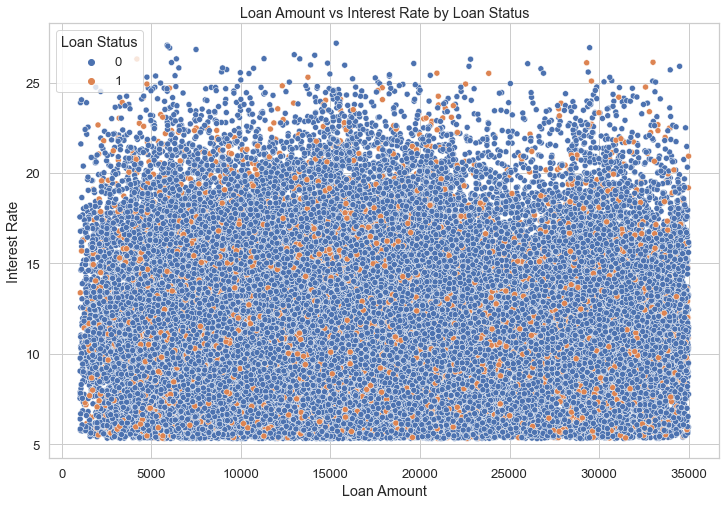

In [9]:
# Scatter plot of loan amounts, values, default or non-defaluted 
sns.set(style="whitegrid", font_scale=1.2)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
sns.scatterplot(x="Loan Amount", y="Interest Rate", hue="Loan Status", data=train, ax=ax)
ax.set_xlabel("Loan Amount")
ax.set_ylabel("Interest Rate")
ax.set_title("Loan Amount vs Interest Rate by Loan Status")

KeyboardInterrupt: 

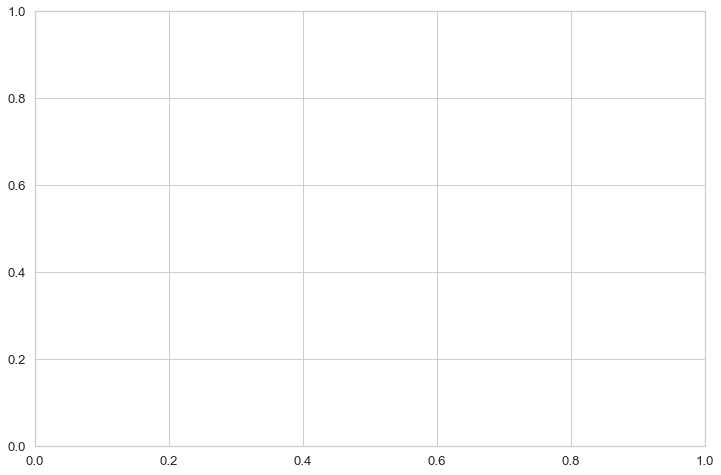

In [10]:
# The Default based on the intrest rate %
sns.set(style="whitegrid", font_scale=1.2)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
sns.barplot(x="Interest Rate", y="Loan Amount", hue="Loan Status", data=train, ax=ax)
ax.set_xlabel("Interest Rate")
ax.set_ylabel("Loan Amount")
ax.set_title("Loan Amount by Interest Rate and Loan Status")
plt.show()

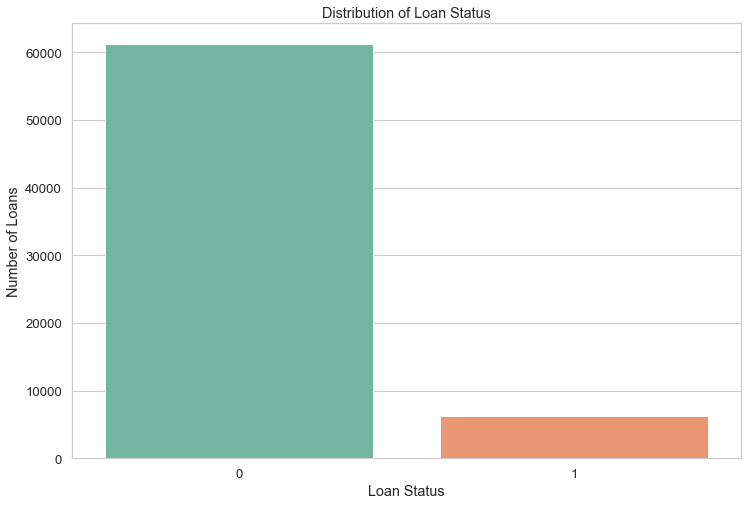

In [11]:
# Bar Chart on the Loan Stats of our data sets
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(data=train, x='Loan Status', palette='Set2')
plt.title('Distribution of Loan Status')
plt.ylabel('Number of Loans')
plt.xlabel('Loan Status')
plt.show()

Text(0, 0.5, 'Percentage')

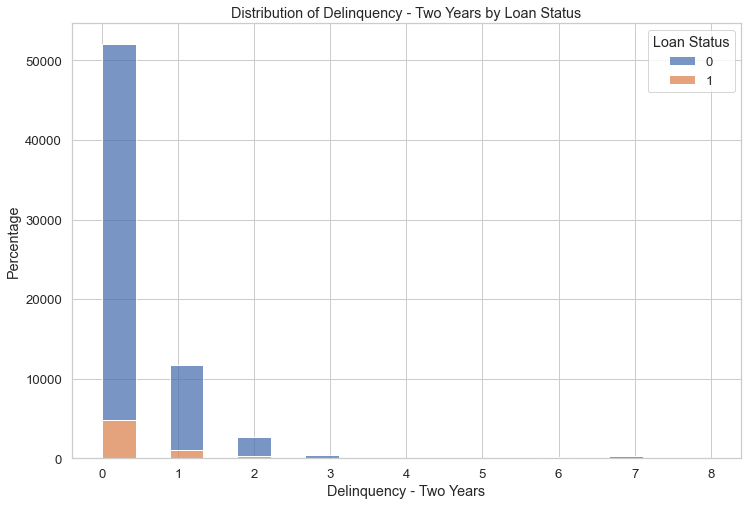

In [12]:
# loan default dist
sns.set(style="whitegrid", font_scale=1.2)
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=train, x="Delinquency - two years", hue="Loan Status", multiple="stack", kde=False, ax=ax)
plt.title("Distribution of Delinquency - Two Years by Loan Status")
plt.xlabel("Delinquency - Two Years")
plt.ylabel("Percentage")

Text(0, 0.5, '%')

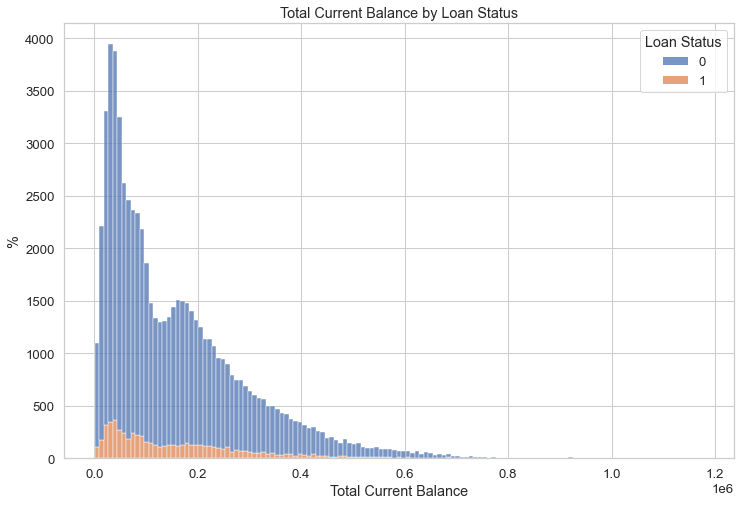

In [13]:
sns.set(style="whitegrid", font_scale=1.2)
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=train, x="Total Current Balance", hue="Loan Status", multiple="stack", kde=False, ax=ax)
plt.title("Total Current Balance by Loan Status")
plt.xlabel("Total Current Balance")
plt.ylabel("%")

# Building the Model

In [19]:
from sklearn.preprocessing import StandardScaler
non_numeric_column = 'Loan Status'
encoded_data = pd.get_dummies(train.drop(non_numeric_column, axis=1))
X = encoded_data
y = train[non_numeric_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.7)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
from imblearn.over_sampling import RandomOverSampler

# Initialize a RandomOverSampler object
oversample = RandomOverSampler(sampling_strategy='minority')

# Viewing original y_train class distribution
print(y_train.value_counts()) 

# Fitting SMOTE to training data
X_train_resampled, y_train_resampled =oversample.fit_resample(X_train, y_train) 

# Previewing synthetic sample class distribution
print(pd.Series(y_train_resampled).value_counts())

0    42842
1     4382
Name: Loan Status, dtype: int64
0    42842
1    42842
Name: Loan Status, dtype: int64


In [22]:
column_names = X.columns
scaled_df_train = pd.DataFrame(X_train_resampled, columns=column_names)
scaled_df_train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Loan Title_pay off bills,Loan Title_payoff,Loan Title_personal,Loan Title_refi,Loan Title_relief,Loan Title_vacation,Initial List Status_f,Initial List Status_w,Application Type_INDIVIDUAL,Application Type_JOINT
0,5695383,29860,8272,9332.715003,59,10.844033,140724.03730,26.046670,0,0,...,0,0,0,0,0,0,1,0,1,0
1,51024466,17836,22696,11757.508470,58,9.272943,160294.08710,22.519537,0,0,...,0,0,0,0,0,0,0,1,1,0
2,2188398,3452,10805,22362.296760,58,10.245227,94391.59579,36.063783,0,0,...,0,0,0,0,0,0,0,1,1,0
3,40816643,7312,15894,11010.130200,59,12.057631,46225.91209,17.143193,0,0,...,0,0,0,0,0,0,0,1,1,0
4,37397012,28247,10863,7264.080429,59,9.027795,46191.14069,20.334934,0,0,...,0,0,0,0,0,0,1,0,1,0


In [25]:
print(pd.Series(y_train_resampled).value_counts())

0    42842
1    42842
Name: Loan Status, dtype: int64


In [27]:
y_train_resampled.mean()

0.5

# Log Regression 

In [57]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming 'Loan Status' is the column with non-numeric values
non_numeric_column = 'Loan Status'

# Encode categorical variables using one-hot encoding
encoder = OneHotEncoder(sparse=False)
encoder.fit(X_train)  # Fit the encoder on the training data

# Transform both the training and testing data
X_train_encoded = encoder.transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Predict the class labels on the testing data
y_pred = lr_model.predict(X_test_encoded)

MemoryError: Unable to allocate 249. GiB for an array with shape (47224, 706655) and data type float64